In [106]:
import numpy as np 
import pandas as pd 

%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [107]:
train_df = pd.read_csv("Titanic_train.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [108]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"'Braund, Mr. Owen Harris'",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"'Cumings, Mrs. John Bradley (Florence Briggs T...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"'Heikkinen, Miss. Laina'",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"'Futrelle, Mrs. Jacques Heath (Lily May Peel)'",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"'Allen, Mr. William Henry'",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum() / train_df.isnull().count() * 100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Missing', 'Percent'])
missing_data.head(3)

,Missing,Percent
Cabin,687,77.3
Age,177,19.9
PassengerId,0,0.0


In [110]:
train_df = train_df.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,S
885,1,1,female,19.0,0,0,30.0000,S
886,0,3,female,NaN,1,2,23.4500,S
887,1,1,male,26.0,0,0,30.0000,C


In [111]:
# save a copy of the original to use later
original_train_df = train_df.copy()

train_df['AgeGroup'] = train_df['Age'].apply(lambda x: ('NK' if pd.isnull(x) else ('Child' if x < 16 else ('Youth' if x < 30 else ('Adult' if x < 65 else 'Senior')))))

train_df['Relatives'] = train_df['SibSp'] + train_df['Parch']
train_df['Relatives'] = train_df['Relatives'].apply(lambda x: 'None' if x == 0 else ('Few' if x < 4 else 'Many'))

train_df['FareGroup'] = train_df['Fare'].apply(lambda x: ('Free' if x == 0 else ('Low' if x < 50 else ('Average' if x < 100 else 'High'))))

train_df = train_df.drop(['Age', 'SibSp', 'Parch', 'Fare'], axis=1)

train_df

,Survived,Pclass,Sex,Embarked,AgeGroup,Relatives,FareGroup
0,0,3,male,S,Youth,Few,Low
1,1,1,female,C,Adult,Few,Average
2,1,3,female,S,Youth,None,Low
3,1,1,female,S,Adult,Few,Average
4,0,3,male,S,Adult,None,Low
...,...,...,...,...,...,...,...
884,0,2,male,S,Youth,None,Low
885,1,1,female,S,Youth,None,Low
886,0,3,female,S,NK,Few,Low
887,1,1,male,C,Youth,None,Low


In [112]:
train_df['Sex'] = train_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
train_df = pd.get_dummies(train_df, columns=['Embarked', 'Relatives', 'AgeGroup', 'FareGroup'])
train_df = train_df.astype(int)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Survived           889 non-null    int64
 1   Pclass             889 non-null    int64
 2   Sex                889 non-null    int64
 3   Embarked_C         889 non-null    int64
 4   Embarked_Q         889 non-null    int64
 5   Embarked_S         889 non-null    int64
 6   Relatives_Few      889 non-null    int64
 7   Relatives_Many     889 non-null    int64
 8   Relatives_None     889 non-null    int64
 9   AgeGroup_Adult     889 non-null    int64
 10  AgeGroup_Child     889 non-null    int64
 11  AgeGroup_NK        889 non-null    int64
 12  AgeGroup_Senior    889 non-null    int64
 13  AgeGroup_Youth     889 non-null    int64
 14  FareGroup_Average  889 non-null    int64
 15  FareGroup_Free     889 non-null    int64
 16  FareGroup_High     889 non-null    int64
 17  FareGroup_Low   

In [113]:
X = train_df.drop("Survived", axis=1)
Y = train_df["Survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 475 to 757
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Pclass             178 non-null    int64
 1   Sex                178 non-null    int64
 2   Embarked_C         178 non-null    int64
 3   Embarked_Q         178 non-null    int64
 4   Embarked_S         178 non-null    int64
 5   Relatives_Few      178 non-null    int64
 6   Relatives_Many     178 non-null    int64
 7   Relatives_None     178 non-null    int64
 8   AgeGroup_Adult     178 non-null    int64
 9   AgeGroup_Child     178 non-null    int64
 10  AgeGroup_NK        178 non-null    int64
 11  AgeGroup_Senior    178 non-null    int64
 12  AgeGroup_Youth     178 non-null    int64
 13  FareGroup_Average  178 non-null    int64
 14  FareGroup_Free     178 non-null    int64
 15  FareGroup_High     178 non-null    int64
 16  FareGroup_Low      178 non-null    int64
dtypes: int64(17)
memory

In [114]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [115]:
Y_pred = decision_tree.predict(X_test)
Y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0])

In [116]:
accuracy_score(Y_test, Y_pred)

0.7921348314606742

In [117]:
confusion_matrix(Y_test, Y_pred)

array([[102,  10],
       [ 27,  39]])

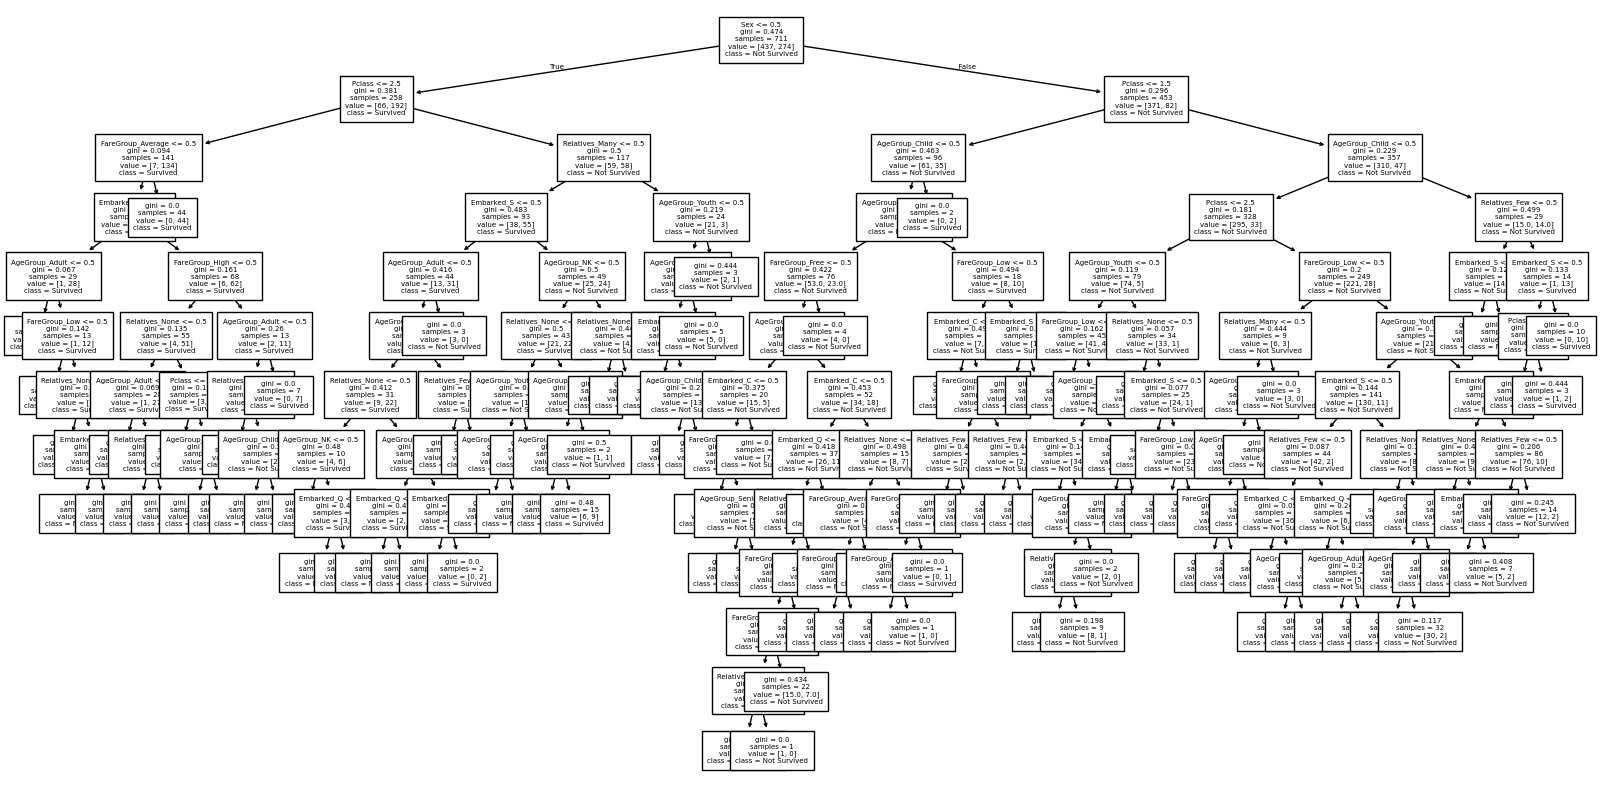

In [118]:
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X_train.columns, class_names=["Not Survived", "Survived"], fontsize=5)
plt.show()

In [119]:
train_df = original_train_df
age_mean = train_df["Age"].mean()
train_df["Age"] = train_df["Age"].fillna(age_mean)

X = train_df.drop("Survived", axis=1)
Y = train_df["Survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 139 to 405
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    178 non-null    int64  
 1   Sex       178 non-null    object 
 2   Age       178 non-null    float64
 3   SibSp     178 non-null    int64  
 4   Parch     178 non-null    int64  
 5   Fare      178 non-null    float64
 6   Embarked  178 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 11.1+ KB


In [120]:
scaler = StandardScaler()
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
139,3,female,0.016313,-0.468566,1.953047,-0.342942,C
857,3,male,0.016313,-0.468566,-0.485261,-0.508023,C
871,3,male,1.347611,-0.468566,-0.485261,-0.471558,S
392,1,female,-0.493115,0.399013,-0.485261,1.675716,C
383,3,male,0.016313,-0.468566,-0.485261,-0.494297,S


In [121]:
categorical_columns = ['Pclass', 'Sex', 'Embarked']
X_train = pd.get_dummies(X_train, columns=categorical_columns)
X_test = pd.get_dummies(X_test, columns=categorical_columns)

X_test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
139,0.016313,-0.468566,1.953047,-0.342942,False,False,True,True,False,True,False,False
857,0.016313,-0.468566,-0.485261,-0.508023,False,False,True,False,True,True,False,False
871,1.347611,-0.468566,-0.485261,-0.471558,False,False,True,False,True,False,False,True
392,-0.493115,0.399013,-0.485261,1.675716,True,False,False,True,False,True,False,False
383,0.016313,-0.468566,-0.485261,-0.494297,False,False,True,False,True,False,False,True


In [122]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

Y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0])

In [123]:
accuracy_score(Y_test, Y_pred)

0.8033707865168539

In [124]:
confusion_matrix(Y_test, Y_pred)

array([[97, 15],
       [20, 46]])

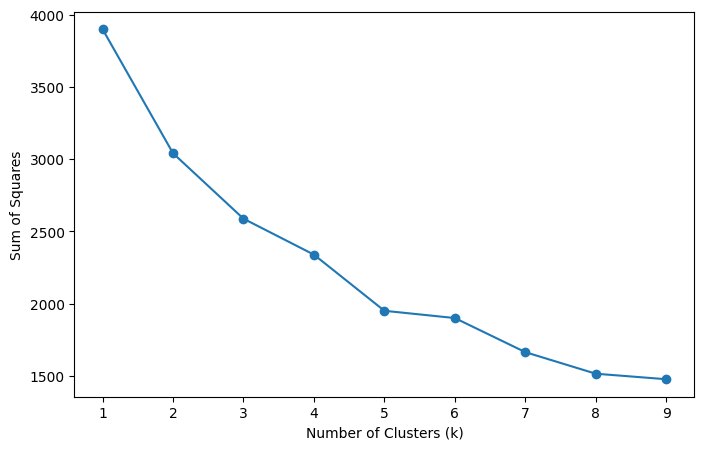

In [125]:
sum_of_squares = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    sum_of_squares.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, sum_of_squares, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squares")
plt.show()

In [126]:
lof = LocalOutlierFactor(n_neighbors=4, contamination=0.1)
lof_outliers = lof.fit_predict(X_train)
lof_outliers = (lof_outliers == -1)

isf = IsolationForest(contamination=0.1)
isf.fit(X_train)
isf_outliers = isf.predict(X_train)
isf_outliers = (isf_outliers == -1)

common_outliers = np.where(lof_outliers & isf_outliers)[0]
X_train.iloc[common_outliers]

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
625,2.114580,-0.468566,-0.485261,-0.402574,False,True,False,False,True,False,True,False
321,0.043763,-0.468566,-0.485261,-0.402574,False,True,False,True,False,False,True,False
302,0.016313,-0.468566,-0.485261,-0.402574,False,True,False,True,False,False,True,False
